Title


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import json
import scipy
import librosa

In [2]:
def plot_waveforms(audio, fs):
    """Plots the waveform of audio in the time domain.
    
    Parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        
    """
    plt.figure(figsize=(12, 6))
    librosa.display.waveshow(audio, sr=fs, alpha=0.58)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [3]:
def calculate_spectrum(audio, kind='mag'):
    """
    Calculates the spectrum of an audio signal.
    Parameters:
        audio (numpy.ndarray): audio signal
        kind (str): 'mag' for magnitude, 'phase' for phase, 'complex' for complex
    """
    spec = scipy.fft.fft(audio)
    if kind == 'mag':
        return 20*np.log10(np.abs(spec))
    elif kind == 'phase':
        return np.angle(spec)
    elif kind == 'complex':
        return 20*np.log10(spec)
    else:
        raise ValueError('Invalid kind')

In [4]:
#Function to plot spectrum 
def plot_spec(audio, fs, kind):
    """
    Plots the spectrum of an audio signal.
    parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        kind (str): 'mag' for magnitude, 'phase' for phase, 'complex' for complex
    """
    spec_db = calculate_spectrum(audio, kind)
    frequency_axis = np.linspace(0, fs, len(spec_db))
    #Nyquist frequencies
    frequency_axis = frequency_axis[:len(frequency_axis)//2]
    spec_db = spec_db[:len(spec_db)//2]

    #plot
    ax = plt.figure(figsize=(12, 6))
    plt.plot(frequency_axis, spec_db)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.show()
    if fs < 44100:
        plt.xticks([1, 2, 4, 8, 16, 31, 63, 125, 250,500,1000,2000,5000,10000], 
                   ["1", "2", "4", "8", "16", "31", "63", "125", "250", "500", "1K", "2K", "5K", "10K"])
    else:
        plt.xticks([1, 2, 4, 8, 16, 31, 63, 125, 250,500,1000,2000,5000,10000, 20000], 
                   ["1", "2", "4", "8", "16", "31", "63", "125", "250", "500", "1K", "2K", "5K", "10K", "20k"])


In [5]:
def calculate_stft(audio, fs, n_fft=2048, hop_length=512, dB=True):
    """
    Calculates the Short-Time Fourier Transform (STFT) of an audio signal.
    Parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        n_fft (int): number of samples per frame
        hop_length (int): number of samples between frames
        dB (bool): if True, returns the magnitude in decibels
    """
    stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    if dB:
        return librosa.amplitude_to_db(np.abs(stft)) # Convert to dB in log scale
    else:
        return np.abs(stft)

In [6]:
def spectrogram(audio, fs, n_fft = 2048, hop_length = 512, dB = True):
    """
    Plots the spectrogram of an audio signal.
    parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        n_fft (int): number of samples per frame
        hop_length (int): number of samples between frames
        dB (bool): if True, returns the magnitude in decibels
    """
    stft_db = calculate_stft(audio, fs, n_fft, hop_length, dB)
    plt.figure(figsize=(12,6))
    librosa.display.specshow(stft_db, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear', cmap = 'inferno')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    plt.tight_layout()

In [7]:
def calculate_mel_spec(audio, fs, n_mfcss=128, n_fft = 2048, hop_length = 512):
    mel_spec = librosa.feature.melspectrogram(audio, sr=fs, n_mels=n_mfcss, n_fft=n_fft, hop_length=hop_length)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db


In [8]:
def plot_mel_spectrogram_audio(audio, fs, n_mfccs=128, n_fft=2048, hop_length=512, fig_size=(12,6)):
    """Plots the mel-scaled spectrogram from audio signal.
    
    Parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        n_mfccs: The number of MFCCs to compute (i.e. dimensionality of mel spectrum)
        n_fft (int): The length (i.e. resolution) of the FFT window (must be power of 2)
        hop_length (int): The number of samples between successive frames
        fig_size (tuple): Dimensions of figure
    """
    # Calculate mel-spectrogram
    mel_spec_db = calculate_mel_spec(audio, fs, n_mfccs=n_mfccs, n_fft=n_fft, hop_length=hop_length)
    
    # Plot Spectrogram
    plt.figure(figsize=fig_size)
    librosa.display.specshow(data=mel_spec_db, sr=fs, x_axis='time', y_axis='mel', cmap='viridis')

    # Put a descriptive title on the plot
    plt.title('Mel Power Spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

In [9]:
def plot_low_res_mfcc(mfcc, fs, fig_size=(12,6)):
    """Plots the mel-scaled spectrogram from mfccs. This is performing the same task as
    'plot_mel_spectrogram_audio' with just a different input.
    
    Parameters:
        mfcc (numpy.ndarray): mfccs of an audio signal
        fs (int): sampling frequency (Hz) of audio signal
        fig_size (tuple): Dimensions of figure
    """
    # Plot Spectrogram
    plt.figure(figsize=fig_size)
    
    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    # abs on signal for better visualization
    librosa.display.specshow(data=mfcc, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
    
    # Put a descriptive title on the plot
    plt.title('MFCCs')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()


Pre-Processed Data Examples:

In [10]:
path_data = 'C:/Users/aksha/Downloads/DataMusic/genres_original/'
genre = 'disco/'
filename = 'disco.00000.wav'

file_path = path_data + genre + filename

print(file_path)

C:/Users/aksha/Downloads/DataMusic/genres_original/disco/disco.00000.wav


In [ ]:
fs = 22050 # sampling rate for librosa to resample to
audio_ex, fs = librosa.load(path=file_path, sr=fs) # load audio and sampling rate


Example Disco Track audio waveform plotted

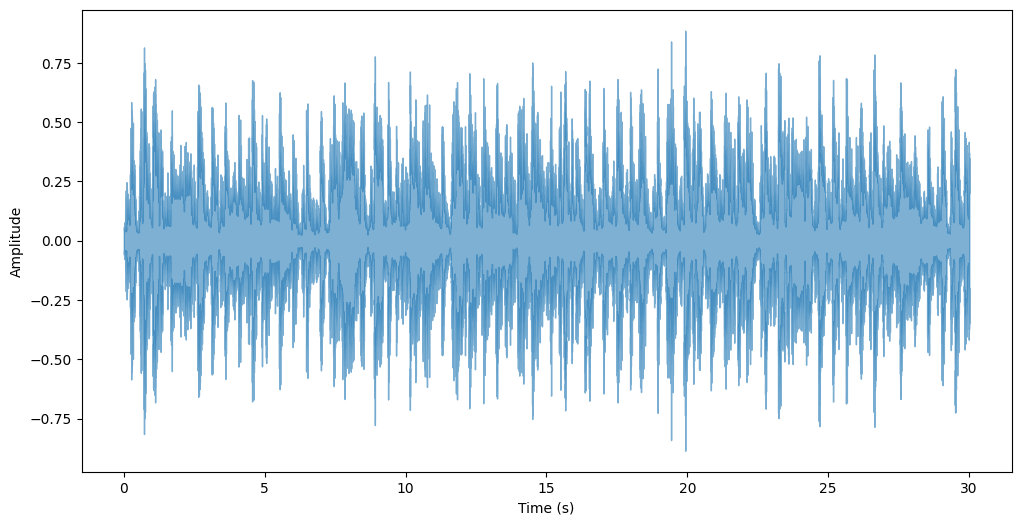

In [ ]:
plot_waveforms(audio_ex, fs)

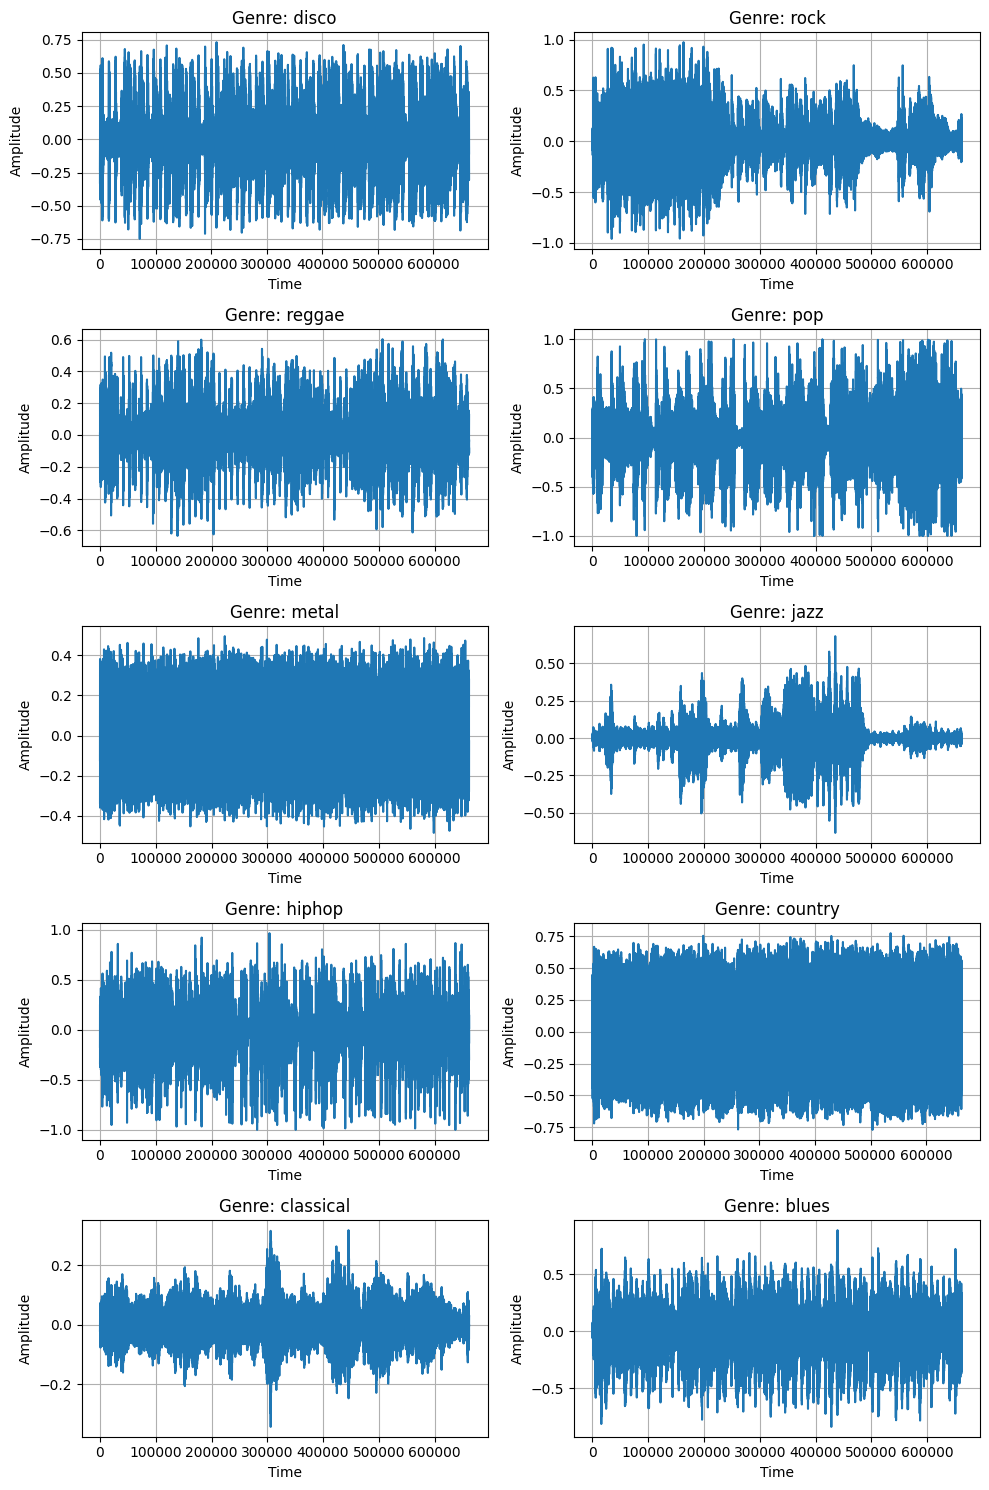

In [ ]:
# Define file paths for all genres
path_data = 'C:/Users/aksha/Downloads/DataMusic/genres_original/'

genres = ['disco', 'rock', 'reggae', 'pop', 'metal', 'jazz', 'hiphop', 'country', 'classical', 'blues']
file_paths = {genre: path_data + genre + '/' + genre + '.00000.wav' for genre in genres}

# Function to plot waveforms
def plot_waveforms(audio_data, sampling_rate, genre_name, subplot_num):
    plt.subplot(5, 2, subplot_num)
    plt.plot(audio_data)
    plt.title(f'Genre: {genre_name}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

# Plotting all waveforms
fs = 22050  # Sampling rate for librosa
plt.figure(figsize=(10, 15))

for i, genre in enumerate(genres):
    file_path = file_paths[genre]
    audio_ex, fs = librosa.load(path=file_path, sr=fs)  # Load audio and resample
    plot_waveforms(audio_ex, fs, genre, i + 1)

plt.tight_layout()
plt.show()


Process code and pad the code to save into .json

In [ ]:
import os
import librosa
import numpy as np
import json
import math

def get_mfccs(directory_path, fs=22500, duration=30, n_fft=2048, hop_length=512, n_mfcc=13, num_segments=10):
    """
    Reads through a directory of audio files and saves a dictionary of MFCCs and genres to a .json file.
    It also returns numpy.ndarrays for MFCCs, genre name, and genre number for each segment of the audio signal.

    Parameters:
        directory_path (str): Path to the directory containing audio files, where each genre has its own folder.
        fs (int): Sampling frequency (Hz) of the audio signal.
        duration (int): Duration of audio signal (sec).
        n_fft (int): The length (i.e. resolution) of the FFT window (must be a power of 2).
        hop_length (int): The number of samples between successive frames.
        n_mfcc (int): The number of MFCCs to compute (dimensionality of mel spectrum).
        num_segments (int): The number of segments to divide the audio signal into.

    Returns:
        np.ndarray: MFCCs for each segment of audio.
        np.ndarray: Genre names for each segment.
        np.ndarray: Genre numbers for each segment.
    """
    data = {
        "genre_name": [],   # List of genre names (i.e., blues, classical, etc.)
        "genre_num": [],    # List of genre numbers (i.e., 0, 1, 2, etc.)
        "mfcc": []          # List of MFCC vectors
    }

    # Calculate the number of samples per track and per segment
    samples_per_track = fs * duration
    samps_per_segment = int(samples_per_track / num_segments)
    mfccs_per_segment = math.ceil(samps_per_segment / hop_length)

    # Loop through all folders & files in the directory
    print("MFCC collection started!")
    print("========================")
    for i, (path_current, folder_names, file_names) in enumerate(os.walk(directory_path)):
        # Skip the parent directory
        if path_current != directory_path:
            genre_current = path_current.split('/')[-1]  # Genre name is the folder name

            # Loop through each file in the genre folder
            for file in file_names:
                file_path = os.path.join(path_current, file).replace(os.sep, '/')  # Get the file path

                try:
                    # Load audio data and resample to fs
                    audio, fs = librosa.load(file_path, sr=fs)

                    # Ensure all audio signals are padded to the same length as the longest one
                    max_len = max([len(audio) for audio in [audio]])  # Get the length of the largest audio signal
                    audio = np.pad(audio, (0, max_len - len(audio)), mode='constant')  # Pad the audio

                    # Loop through audio file segments
                    for seg in range(num_segments):
                        start_sample = seg * samps_per_segment
                        end_sample = start_sample + samps_per_segment

                        # Calculate MFCCs for the segment
                        mfcc = librosa.feature.mfcc(
                            y=audio[start_sample:end_sample],
                            sr=fs,
                            n_fft=n_fft,
                            hop_length=hop_length,
                            n_mfcc=n_mfcc
                        )
                        mfcc = mfcc.T  # Transpose for the correct format

                        # Check if the MFCC length matches the expected number
                        if len(mfcc) == mfccs_per_segment:
                            data["genre_name"].append(genre_current)  # Append genre name
                            data["genre_num"].append(i - 1)  # Append genre number
                            data["mfcc"].append(mfcc.tolist())  # Append MFCC data
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue

            print(f"Collected MFCCs for {genre_current.title()}!")

    # Save data to a JSON file
    with open('data.json', 'w') as filepath:
        print("========================")
        print("Saving data to disk...")
        json.dump(data, filepath, indent=4)
        print("Saving complete!")
        print("========================")

    return np.array(data["mfcc"]), np.array(data["genre_name"]), np.array(data["genre_num"])


In [ ]:

#Example Usage 
import time

# Set parameters for MFCC extraction
fs = 22500  # Sampling rate (Hz)
n_mfcc = 13  # Number of MFCCs
n_fft = 2048  # FFT window size
hop_length = 512  # Hop length
num_segments = 10  # Number of segments (split the track into 10 segments)
track_duration = 30  # Duration of each track (seconds)

directory_path = 'C:/Users/aksha/Downloads/DataMusic/genres_original/'  # Path to your audio data

# Call the function to extract MFCCs
start_time = time.time()
mfccs, genres, genre_nums = get_mfccs(directory_path,
                                      fs=fs,
                                      duration=track_duration,
                                      n_fft=n_fft,
                                      hop_length=hop_length,
                                      n_mfcc=n_mfcc,
                                      num_segments=num_segments)
end_time = time.time()

print(f"MFCC extraction completed in {end_time - start_time:.2f} seconds.")


MFCC collection started!
Collected MFCCs for Blues!
Collected MFCCs for Classical!
Collected MFCCs for Country!
Collected MFCCs for Disco!
Collected MFCCs for Hiphop!


C:\Users\aksha\AppData\Local\Temp\ipykernel_27620\5868778.py:51: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing C:/Users/aksha/Downloads/DataMusic/genres_original/jazz/jazz.00054.wav: 
Collected MFCCs for Jazz!
Collected MFCCs for Metal!
Collected MFCCs for Pop!
Collected MFCCs for Reggae!
Collected MFCCs for Rock!
Saving data to disk...
Saving complete!
MFCC extraction completed in 117.86 seconds.
